# Análisis de datos climáticos desde una API pública

In [122]:
import requests
import pandas as pd
import matplotlib.pyplot as plt

In [123]:
url = "https://api.open-meteo.com/v1/forecast"
params = {
    "latitude": 7.9,
    "longitude": -72.5,
    "hourly": [
        "temperature_2m",
        "relative_humidity_2m",
        "precipitation",
        "rain",
        "weather_code",
    ],
    "timezone": "America/Bogota",
    "past_days": 5,  # Solicita datos de los últimos 5 días
}

res = requests.get(url, params=params)
data = res.json()

# Convierte los datos horarios a un DataFrame
df = pd.DataFrame(data)
df

,latitude,longitude,generationtime_ms,utc_offset_seconds,timezone,timezone_abbreviation,elevation,hourly_units,hourly
time,7.875,-72.5,0.137568,-18000,America/Bogota,GMT-5,299.0,iso8601,"[2026-01-23T00:00, 2026-01-23T01:00, 2026-01-2..."
temperature_2m,7.875,-72.5,0.137568,-18000,America/Bogota,GMT-5,299.0,°C,"[23.7, 23.7, 23.9, 23.8, 23.8, 23.8, 23.7, 23...."
relative_humidity_2m,7.875,-72.5,0.137568,-18000,America/Bogota,GMT-5,299.0,%,"[87, 91, 90, 89, 88, 87, 87, 93, 88, 84, 80, 7..."
precipitation,7.875,-72.5,0.137568,-18000,America/Bogota,GMT-5,299.0,mm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.1, 0.2, ..."
rain,7.875,-72.5,0.137568,-18000,America/Bogota,GMT-5,299.0,mm,"[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ..."
weather_code,7.875,-72.5,0.137568,-18000,America/Bogota,GMT-5,299.0,wmo code,"[2, 2, 3, 3, 3, 3, 3, 2, 80, 2, 2, 2, 2, 2, 80..."


In [124]:
# Convierte los datos horarios a un DataFrame
df = pd.DataFrame(data["hourly"])
df

,time,temperature_2m,relative_humidity_2m,precipitation,rain,weather_code
0,2026-01-23T00:00,23.7,87,0.0,0.0,2
1,2026-01-23T01:00,23.7,91,0.0,0.0,2
2,2026-01-23T02:00,23.9,90,0.0,0.0,3
3,2026-01-23T03:00,23.8,89,0.0,0.0,3
4,2026-01-23T04:00,23.8,88,0.0,0.0,3
...,...,...,...,...,...,...
283,2026-02-03T19:00,25.2,83,0.1,0.0,3
284,2026-02-03T20:00,24.6,84,0.3,0.0,80
285,2026-02-03T21:00,24.2,85,0.3,0.0,80
286,2026-02-03T22:00,23.9,85,0.3,0.0,80


In [125]:
columnas = [
    "Hora",
    "Temperatura",
    "Humedad",
    "Precipitacion",
    "Lluvia",
    "Codigo del clima",
]
df.columns = columnas
df

,Hora,Temperatura,Humedad,Precipitacion,Lluvia,Codigo del clima
0,2026-01-23T00:00,23.7,87,0.0,0.0,2
1,2026-01-23T01:00,23.7,91,0.0,0.0,2
2,2026-01-23T02:00,23.9,90,0.0,0.0,3
3,2026-01-23T03:00,23.8,89,0.0,0.0,3
4,2026-01-23T04:00,23.8,88,0.0,0.0,3
...,...,...,...,...,...,...
283,2026-02-03T19:00,25.2,83,0.1,0.0,3
284,2026-02-03T20:00,24.6,84,0.3,0.0,80
285,2026-02-03T21:00,24.2,85,0.3,0.0,80
286,2026-02-03T22:00,23.9,85,0.3,0.0,80


In [126]:
df["Hora"] = pd.to_datetime(df["Hora"])
df = df[columnas[:-1]]
df

,Hora,Temperatura,Humedad,Precipitacion,Lluvia
0,2026-01-23 00:00:00,23.7,87,0.0,0.0
1,2026-01-23 01:00:00,23.7,91,0.0,0.0
2,2026-01-23 02:00:00,23.9,90,0.0,0.0
3,2026-01-23 03:00:00,23.8,89,0.0,0.0
4,2026-01-23 04:00:00,23.8,88,0.0,0.0
...,...,...,...,...,...
283,2026-02-03 19:00:00,25.2,83,0.1,0.0
284,2026-02-03 20:00:00,24.6,84,0.3,0.0
285,2026-02-03 21:00:00,24.2,85,0.3,0.0
286,2026-02-03 22:00:00,23.9,85,0.3,0.0


In [134]:
# haveriguar si hay valores nulos
df.isnull().sum()

Hora             0
Temperatura      0
Humedad          0
Precipitacion    0
Lluvia           0
dtype: int64

In [127]:
df[columnas[1:-1]].describe()

,Temperatura,Humedad,Precipitacion,Lluvia
count,288.000000,288.000000,288.000000,288.0
mean,25.207292,83.878472,0.214583,0.0
std,1.692343,7.316810,0.458671,0.0
min,22.800000,60.000000,0.000000,0.0
25%,23.900000,80.000000,0.000000,0.0
50%,24.600000,84.000000,0.000000,0.0
75%,26.200000,89.250000,0.300000,0.0
max,30.500000,98.000000,2.600000,0.0


In [128]:
def crear_grafica_lineas(
    eje_x,
    eje_y,
    titulo,
    etiqueta_x,
    etiqueta_y,
    grid=True,
    color="blue",
    label=None,
    nombre=None,
):

    plt.figure(figsize=(15, 6))
    plt.plot(eje_x, eje_y, linestyle="-", color=color, label=label)
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    if label:
        plt.legend()
    plt.grid(grid)
    if nombre:
        path = f"../results/{nombre}.png"
        plt.savefig(path, bbox_inches="tight", dpi=200)
    plt.show()
    plt.close()

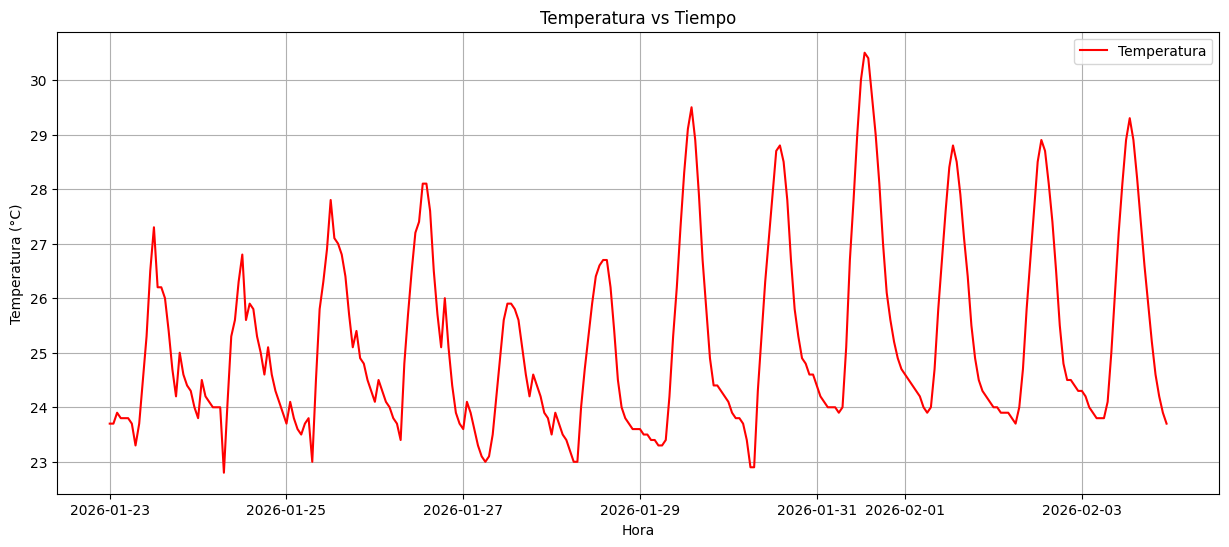

In [129]:
# Temperatura vs tiempo
crear_grafica_lineas(
    df["Hora"],
    df["Temperatura"],
    "Temperatura vs Tiempo",
    "Hora",
    "Temperatura (°C)",
    color="r",
    label="Temperatura",
    nombre="temperatura_vs_tiempo",
)

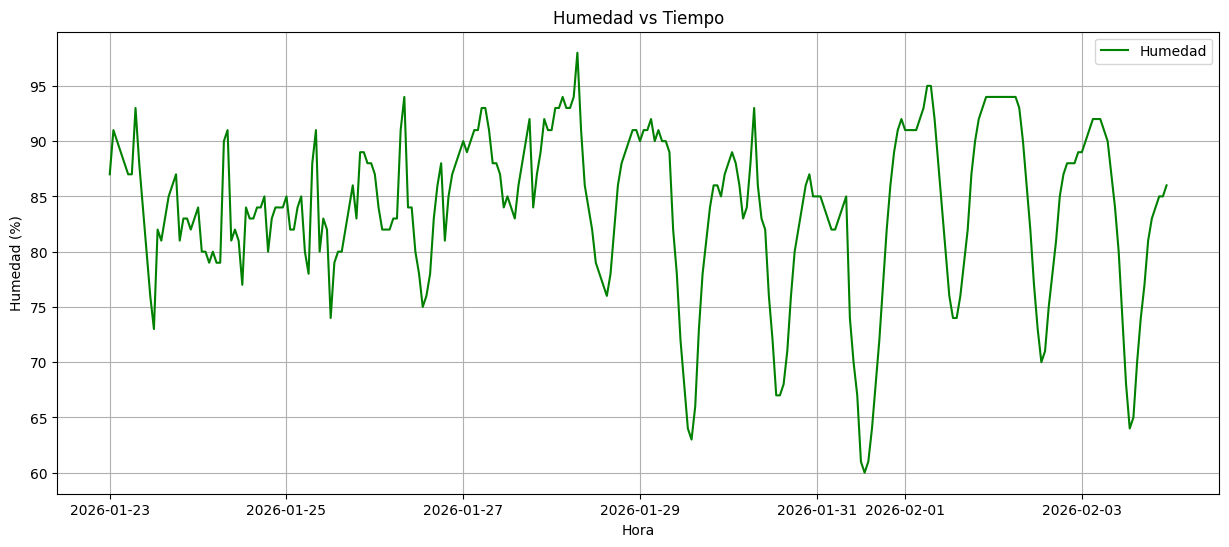

In [130]:
# Humedad vs tiempo
crear_grafica_lineas(
    df["Hora"],
    df["Humedad"],
    "Humedad vs Tiempo",
    "Hora",
    "Humedad (%)",
    color="g",
    label="Humedad",
    nombre="humedad_vs_tiempo",
)

In [131]:
# crear histograma
def crear_histograma(
    datos,
    titulo,
    etiqueta_x,
    etiqueta_y,
    grid=True,
    color="blue",
    bins=10,
    label=None,
    nombre=None,
):
    plt.figure(figsize=(10, 6))
    plt.hist(datos, bins=bins, color=color, edgecolor="black", label=label, alpha=0.7)
    plt.title(titulo)
    plt.xlabel(etiqueta_x)
    plt.ylabel(etiqueta_y)
    if label:
        plt.legend()
    plt.grid(grid)
    if nombre:
        path = f"../results/{nombre}.png"
        plt.savefig(path, bbox_inches="tight", dpi=200)

    plt.show()
    plt.close()

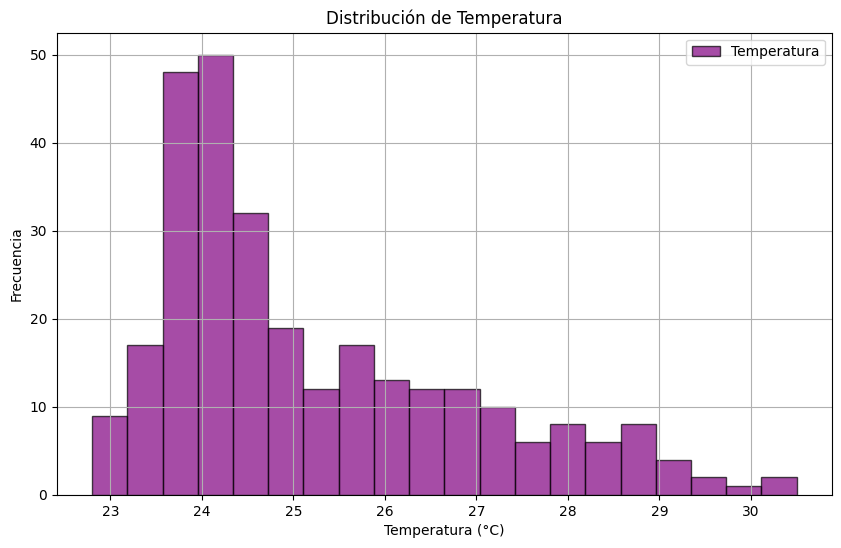

In [132]:
# crear Histograma de temperatura
crear_histograma(df['Temperatura'], 'Distribución de Temperatura', 'Temperatura (°C)', 'Frecuencia', color='purple', bins=20, label='Temperatura', nombre='histograma_temperatura')

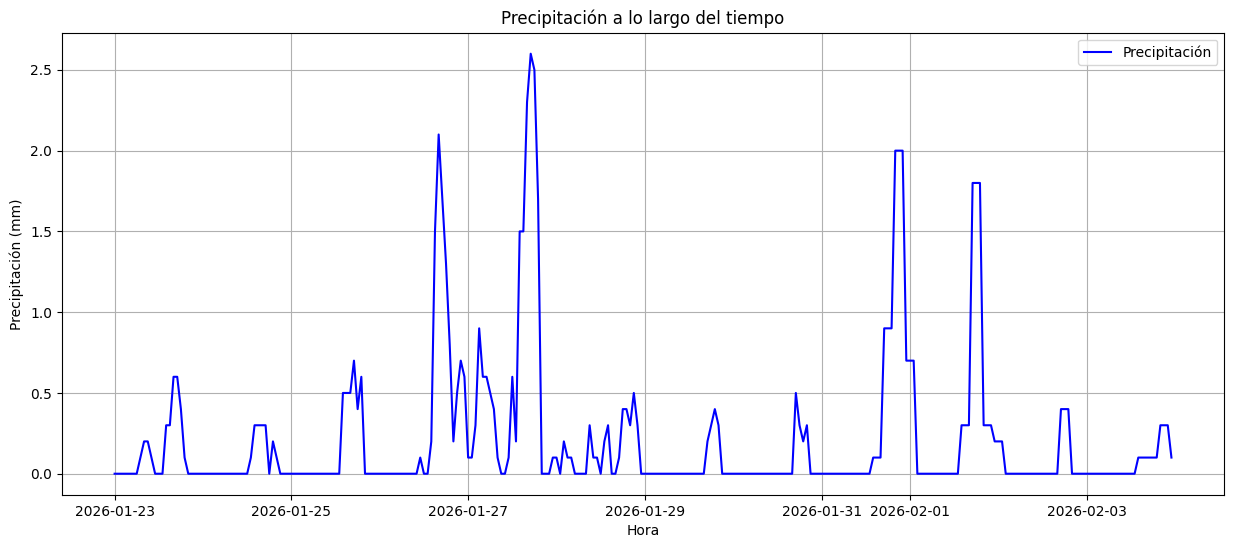

In [133]:
# Precipitación a lo largo del tiempo
crear_grafica_lineas(df['Hora'], df['Precipitacion'], 'Precipitación a lo largo del tiempo', 'Hora', 'Precipitación (mm)', color='b', label='Precipitación', nombre='precipitacion_tiempo')